# 第01周作业：Ames房价线性回归 Linear Regression
根据房屋的特征来预测亚美尼亚州洛瓦市（Ames，Lowa）的房价。
其中房屋的特征 x 共有 79 维，响应值 y 为每个房屋的销售价格（SalePrice）。 
训练和测试 3 个线性回归模型（最小二乘、岭回归、 Lasso），进行正则超参数的调优，并对模型的性能和预测能力进行测试。
评价标准为预测值的对数和观测值的对数的 RMSE(Root-Mean-Squared-Error )。

## 这里读取的是数据探索2 处理之后的数据
## 代码版本 Python3

In [10]:
# 导入必要的工具包
import numpy as np #用于数值计算
import pandas as pd #用于数据表处理，数据文件读写

import matplotlib.pyplot as plt #用于绘图：分析结果的可视化。
import seaborn as sns #用于绘图：分析结果的可视化。封装更好。
from IPython.display import display

#应该是设置浮点数的形式格式，小数点后三位
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#这一行是干嘛的？ 设置 matplotlib 让绘制的图形出现在 Notebook 里而不是新窗口
%matplotlib inline

#读取训练数据: 
dpath = './data/'
data = pd.read_csv(dpath + 'AmesHouse_FE_DE2_train.csv')
data.head(6) #查看数据的前几行，默认是 5 

,LotFrontage,LotArea,LotShape,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,KitchenScore,FireplaceScore,GarageScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan,SalePrice
0,0.227,-0.203,0.701,1.054,0.881,0.534,0.950,-0.073,-0.629,0.891,...,0.936,-0.952,0.307,1.665,0.012,0.426,-0.246,1.220,-0.304,208500
1,0.670,-0.086,0.701,0.159,-0.427,-0.574,0.950,-0.073,2.272,0.891,...,-1.002,0.610,-0.081,0.380,-0.044,-0.485,-0.828,-0.820,-0.304,181500
2,0.316,0.081,-1.029,0.988,0.832,0.342,0.950,-0.073,0.338,0.891,...,0.936,0.610,0.571,1.665,0.196,0.580,-0.427,1.220,-0.304,223500
3,0.080,-0.091,-1.029,-1.861,-0.718,-0.574,-0.875,3.715,-0.629,0.891,...,0.936,0.610,0.720,-0.263,-0.111,0.440,2.101,-0.820,-0.304,140000
4,0.789,0.387,-1.029,0.954,0.735,1.404,0.950,-0.073,1.305,0.891,...,0.936,0.610,1.574,1.665,1.034,1.418,-0.026,1.220,-0.304,250000
5,0.818,0.372,-1.029,0.723,0.493,-0.574,0.950,-0.073,-0.629,0.891,...,-1.002,-0.952,0.007,0.380,-0.525,-0.282,2.511,-0.820,-0.304,143000


In [11]:
## 各属性的统计信息（样本数目、均值、标准差、最小值、最大值、1/4分位数、中值（1/2分位数）、3/4分位数）
data.describe()

,LotFrontage,LotArea,LotShape,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,KitchenScore,FireplaceScore,GarageScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan,SalePrice
count,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,...,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000,1454.000
mean,-0.002,-0.002,0.001,-0.001,-0.001,-0.008,-0.001,0.000,-0.003,-0.001,...,-0.001,-0.002,-0.002,-0.003,-0.005,-0.004,0.000,-0.002,-0.002,179548.514
std,0.999,0.999,1.000,1.000,1.000,0.978,1.000,1.001,0.997,1.000,...,1.000,0.999,1.000,0.997,0.993,0.994,1.001,1.000,0.997,75005.063
min,-1.692,-0.928,-4.487,-3.285,-1.687,-0.574,-2.699,-3.861,-0.629,-2.757,...,-2.941,-0.952,-2.105,-1.549,-2.924,-2.371,-0.828,-0.820,-0.304,34900.000
25%,-0.452,-0.295,-1.029,-0.569,-0.899,-0.574,-0.875,-0.073,-0.629,-0.933,...,-1.002,-0.952,-0.626,-0.263,-0.716,-0.769,-0.828,-0.820,-0.304,129900.000
50%,0.168,-0.100,0.701,0.027,0.396,-0.574,0.950,-0.073,-0.629,0.891,...,0.936,0.610,0.007,-0.263,-0.109,-0.091,-0.370,-0.820,-0.304,162950.000
75%,0.633,0.111,0.701,0.954,0.929,0.342,0.950,-0.073,0.338,0.891,...,0.936,0.610,0.430,0.380,0.585,0.548,0.470,1.220,-0.304,213500.000
max,7.550,20.776,0.701,1.286,1.220,8.468,0.950,3.715,2.272,0.891,...,4.812,3.735,6.028,4.879,5.091,4.050,8.970,1.220,3.292,582933.000


In [12]:
data.info()  #查看数据基本信息，各个特征的数据类型 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 33 columns):
LotFrontage       1454 non-null float64
LotArea           1454 non-null float64
LotShape          1454 non-null float64
YearBuilt         1454 non-null float64
YearRemodAdd      1454 non-null float64
MasVnrArea        1454 non-null float64
BsmtQual          1454 non-null float64
BsmtCond          1454 non-null float64
BsmtExposure      1454 non-null float64
BsmtFinType1      1454 non-null float64
BsmtFinSF1        1454 non-null float64
BsmtUnfSF         1454 non-null float64
HeatingQC         1454 non-null object
BedroomAbvGr      1454 non-null float64
TotRmsAbvGrd      1454 non-null float64
Functional        1454 non-null float64
GarageYrBlt       1454 non-null float64
GarageCars        1454 non-null float64
PavedDrive        1454 non-null float64
WoodDeckSF        1454 non-null float64
OverallGrade      1454 non-null float64
GarageGrade       1454 non-null float64
ExterGrade    

In [13]:
# HeatingQC 不知道为什么变成了 object 类型，转换为 float 类型 '-143%' 异常值
#data.HeatingQC.values = [float(value) for value in data.HeatingQC.values]
ls = []
for value in data.HeatingQC.values:
    if value == '-143%':
        value = -1.43
    ls.append(float(value))
data.HeatingQC = ls
#print(data.HeatingQC)

In [14]:
data.info() #查看各个特征的数据类型 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 33 columns):
LotFrontage       1454 non-null float64
LotArea           1454 non-null float64
LotShape          1454 non-null float64
YearBuilt         1454 non-null float64
YearRemodAdd      1454 non-null float64
MasVnrArea        1454 non-null float64
BsmtQual          1454 non-null float64
BsmtCond          1454 non-null float64
BsmtExposure      1454 non-null float64
BsmtFinType1      1454 non-null float64
BsmtFinSF1        1454 non-null float64
BsmtUnfSF         1454 non-null float64
HeatingQC         1454 non-null float64
BedroomAbvGr      1454 non-null float64
TotRmsAbvGrd      1454 non-null float64
Functional        1454 non-null float64
GarageYrBlt       1454 non-null float64
GarageCars        1454 non-null float64
PavedDrive        1454 non-null float64
WoodDeckSF        1454 non-null float64
OverallGrade      1454 non-null float64
GarageGrade       1454 non-null float64
ExterGrade   

In [15]:
# 从原始数据中分离输入特征x和输出y
y = data['SalePrice'].values
X = data.drop('SalePrice', axis = 1)

当数据量比较大时(多大？100？1000？)，可用 train_test_split 从训练集中分出一部分做校验集； 

样本数目较少时（多少？100？10？），建议用交叉验证。

在线性回归中，留一交叉验证有简便计算方式（能否详细介绍？举例说明），无需显式交叉验证。

下面将训练数据分割成训练集和测试集，用于对模型的训练误差、校验集上的测试误差估计、和测试集上的测试误差做个比较。

实际任务中无需这么处理。为什么？不这么处理，怎么比较误差？

In [16]:
#将数据分割: 训练数据与测试数据
from sklearn.cross_validation import train_test_split

# 随机采样 25% (test_size 设置？应该是 0.25 吧？)的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

警告 cross_validation 这个模块将被移除，新模块是什么？如何调用？
#### 对输出 y 也要进行标准化？下面示例代码

In [ ]:
''' 这个是授课示例代码 
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

#y_train = ss_y.fit_transform(y_train)
#y_test = ss_y.transform(y_test)

y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))
'''

In [17]:
#读取测试数据: 
testData = pd.read_csv(dpath + 'AmesHouse_FE_DE2_test.csv')
testData.head(6) #查看数据的前几行，默认是 5 

,Id,LotFrontage,LotArea,LotShape,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,...,ExterGrade,KitchenScore,FireplaceScore,GarageScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan
0,1461,0.670,0.119,0.701,-0.337,-1.154,-0.574,-0.875,-0.073,-0.629,...,-0.776,-1.002,-0.952,1.108,-1.549,-1.025,-1.229,0.317,-0.820,-0.304
1,1462,0.700,0.387,-1.029,-0.437,-1.299,0.037,-0.875,-0.073,-0.629,...,-0.776,0.936,-0.952,-0.732,-0.906,0.133,-0.349,-0.484,1.220,-0.304
2,1463,0.493,0.343,-1.029,0.855,0.638,-0.574,0.950,-0.073,-0.629,...,-0.776,-1.002,0.610,0.016,0.380,-0.000,0.261,-0.503,-0.820,-0.304
3,1464,0.611,-0.048,-1.029,0.888,0.638,-0.461,-0.875,-0.073,-0.629,...,-0.776,0.936,0.610,-0.037,0.380,-0.036,0.210,-0.484,1.220,-0.304
4,1465,-0.422,-0.552,-1.029,0.689,0.348,-0.574,0.950,-0.073,-0.629,...,0.784,0.936,-0.952,0.122,-0.263,0.004,-0.448,1.328,-0.820,-0.304
5,1466,0.523,-0.046,-1.029,0.723,0.445,-0.574,0.950,-0.073,-0.629,...,-0.776,-1.002,0.610,-0.169,0.380,-0.183,0.314,-0.026,-0.820,-0.304


In [19]:
testData.info()  #查看数据基本信息，各个特征的数据类型 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
Id                1459 non-null int64
LotFrontage       1459 non-null float64
LotArea           1459 non-null float64
LotShape          1459 non-null float64
YearBuilt         1459 non-null float64
YearRemodAdd      1459 non-null float64
MasVnrArea        1459 non-null float64
BsmtQual          1459 non-null float64
BsmtCond          1459 non-null float64
BsmtExposure      1459 non-null float64
BsmtFinType1      1459 non-null float64
BsmtFinSF1        1459 non-null float64
BsmtUnfSF         1459 non-null float64
HeatingQC         1459 non-null float64
BedroomAbvGr      1459 non-null float64
TotRmsAbvGrd      1459 non-null float64
Functional        1459 non-null float64
GarageYrBlt       1459 non-null float64
GarageCars        1459 non-null float64
PavedDrive        1459 non-null float64
WoodDeckSF        1459 non-null float64
OverallGrade      1459 non-null float64
GarageGrade    

In [20]:
# 从原始数据中分离 testId 和输入特征 testX 
testId = testData['Id'].values
testX = testData.drop('Id', axis = 1)

## 模型训练
### 1. 尝试缺省参数的线性回归：最小二乘

In [28]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化：各个参数的含义还不明白
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测，下面计算 score 会自动调用 predict
lr_y_predict = lr.predict(X_test)
lr_y_predict_train = lr.predict(X_train)

#显示特征的回归系数
lr.coef_

array([  3044.30050179,   3094.48327574,  -2370.54828466,  13836.3962625 ,
         3596.26847827,   5932.76346729,  -2064.67556005,  -1392.14571099,
         4993.61350754,    179.60175048,   9013.04217229,    400.88435811,
         2271.36611707,  -6880.99512354,   3730.92220983,   4765.35734809,
           23.15110329,   2493.73323354,   -707.41710776,   3077.59324865,
        10313.73380694,  -1271.66093333,   2731.51325045,  -1916.29779659,
         4012.05848346,   5644.4410255 ,   -242.06096071,  20074.40494538,
        18386.0263966 ,   2333.38986959,  -3246.16622385,   8659.88526377])

#### 1.1 模型评价

In [29]:
# 使用 LinearRegression 模型自带的评估模块（r2_score），并输出评估结果

#测试集
lrScoreTest = lr.score(X_test, y_test)
print('The value of default measurement of LinearRegression on test is', lrScoreTest) 

#训练集
lrScoreTrain = lr.score(X_train, y_train)
print('The value of default measurement of LinearRegression on train is', lrScoreTrain) 

The value of default measurement of LinearRegression on test is 0.869682011358
The value of default measurement of LinearRegression on train is 0.867229963932


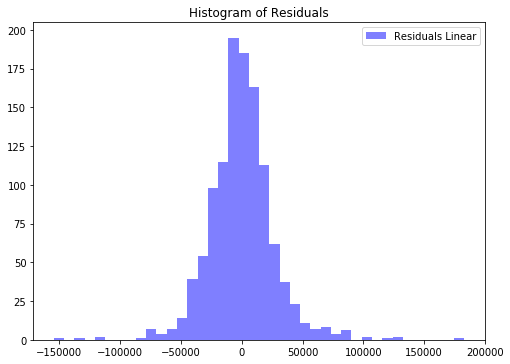

In [30]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best') #这个干嘛的？

残差分布和高斯分布匹配得很好

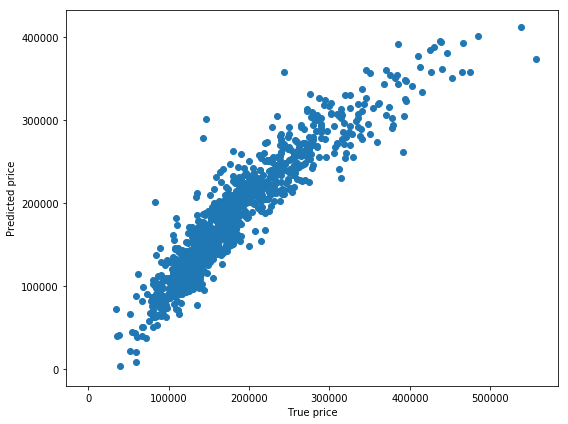

In [31]:
#观察预测值与真值的散点图
plt.figure(figsize=(8, 6))
plt.scatter(y_train, lr_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

看上去好像一条直线，略微向上隆起，可能是因为没有对输出值 y 进行标准化。
#### 1.2 LinearRegression 模型应用

In [43]:
#对测试数据进行预测
lr_y_predict_test = lr.predict(testX)
print('lr_y_predict_test = ', lr_y_predict_test)

#输出预测后的数据
testPredict = testData.copy()
testPredict['SalePrice'] = lr_y_predict_test
testPredict.to_csv(dpath + 'AmesHouse_Predict_LR.csv', index=False)

lr_y_predict_test =  [ 119124.16920843  152622.83619616  199081.61011573 ...,  199317.3896891
  118800.79548337  251331.68065119]


In [44]:
testPredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 34 columns):
Id                1459 non-null int64
LotFrontage       1459 non-null float64
LotArea           1459 non-null float64
LotShape          1459 non-null float64
YearBuilt         1459 non-null float64
YearRemodAdd      1459 non-null float64
MasVnrArea        1459 non-null float64
BsmtQual          1459 non-null float64
BsmtCond          1459 non-null float64
BsmtExposure      1459 non-null float64
BsmtFinType1      1459 non-null float64
BsmtFinSF1        1459 non-null float64
BsmtUnfSF         1459 non-null float64
HeatingQC         1459 non-null float64
BedroomAbvGr      1459 non-null float64
TotRmsAbvGrd      1459 non-null float64
Functional        1459 non-null float64
GarageYrBlt       1459 non-null float64
GarageCars        1459 non-null float64
PavedDrive        1459 non-null float64
WoodDeckSF        1459 non-null float64
OverallGrade      1459 non-null float64
GarageGrade    

#### 1.3 线性模型，随机梯度下降优化模型参数

In [45]:
# 随机梯度下降一般在大数据集上应用 
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor(max_iter=1000)

# 训练：参数估计
sgdr.fit(X_train, y_train)

# 预测
sgdr_y_predict = sgdr.predict(X_test)

#显示特征的回归系数
sgdr.coef_

array([  3066.19866078,   3082.37349017,  -2464.19226904,  13941.54952365,
         3704.84562036,   6007.59186547,  -1966.55557506,  -1346.92252393,
         5009.46038496,    176.74505995,   9033.71353362,    528.34913272,
         2350.57577773,  -6896.91540497,   3827.8946752 ,   4725.74591377,
          140.11686337,   2611.3919319 ,   -626.11585156,   3107.37744864,
        10389.47048453,  -1200.78169031,   2819.2746608 ,  -1851.36891835,
         4111.32833441,   5760.32155635,   -164.96825177,  20173.40663086,
        18495.76108299,   2365.87966183,  -3140.94748904,   8709.94302612])

In [46]:
# 使用 SGDRegressor 模型自带的评估模块，并输出评估结果
#测试集
sgdrScoreTest = sgdr.score(X_test, y_test)
print('The value of default measurement of SGDRegressor on test is', sgdrScoreTest) 

#训练集
sgdrScoreTrain = sgdr.score(X_train, y_train)
print('The value of default measurement of SGDRegressor on train is', sgdrScoreTrain)

print('sgdrScoreTest - lrScoreTest = ', sgdrScoreTest - lrScoreTest)
print('sgdrScoreTrain - lrScoreTrain = ', sgdrScoreTrain - lrScoreTrain)

The value of default measurement of SGDRegressor on test is 0.869119737523
The value of default measurement of SGDRegressor on train is 0.866976033142
sgdrScoreTest - lrScoreTest =  -0.000562273834597
sgdrScoreTrain - lrScoreTrain =  -0.000253930790153


这里由于样本数不多，SGDRegressor 可能不如 LinearRegression。 

sklearn 建议样本数超过 10 万采用 SGDRegressor

训练集上的评分比 LinearRegression 低一点点。

测试集上的评分比 LinearRegression 高一点点。泛化能力更强？需要进一步验证

#### 1.4  SGDRegressor 模型应用

In [52]:
#对测试数据进行预测
sgdr_y_predict_test = sgdr.predict(testX)
print('sgdr_y_predict_test = ', sgdr_y_predict_test)

#输出预测后的数据
testPredict = testData.copy()
testPredict['SalePrice'] = sgdr_y_predict_test
testPredict.to_csv(dpath + 'AmesHouse_Predict_sgdr.csv', index=False)

sgdr_y_predict_test =  [ 117712.58484938  151894.11963583  199271.59084834 ...,  198974.29512784
  117356.23689992  252303.16992271]


### 2 正则化的线性回归（L2正则 --> 岭回归）

In [49]:
#岭回归／L2正则
from sklearn.linear_model import RidgeCV

#正则项的参数
alphas = [0.01, 0.1, 1, 10, 20, 40, 80,100]

#创建岭回归模块实例
reg = RidgeCV(alphas=alphas, store_cv_values=True)

#进行模型训练
reg.fit(X_train, y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 20, 40, 80, 100], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

#### 2.1 岭回归模型评价

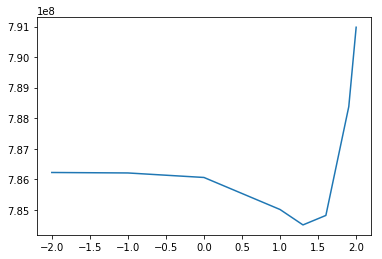

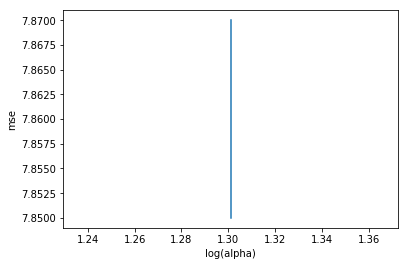

alpha is: 20.0


array([  3042.73186188,   3123.69670449,  -2407.68723955,  12504.18053507,
         3647.17354458,   5909.36521184,  -1532.71358393,  -1432.38898637,
         4977.76132101,    216.05629491,   9288.92314446,    976.08311132,
         2281.14339735,  -6452.87598655,   4070.24096307,   4619.25039282,
          428.50866749,   2811.02245316,   -428.36515364,   3072.65548521,
        10105.32381837,  -1166.47136103,   2799.96034049,  -1641.81517022,
         4250.34411935,   5496.56194997,    349.86306081,  18944.24797457,
        17625.53426113,   2350.772471  ,  -2937.39552092,   8564.25681194])

In [50]:
#均方误差 axis=0 什么意思？帮助文档里面没有
mse_mean = np.mean(reg.cv_values_, axis=0)

#正则项参数取对数， mse_mean.reshape() 干什么的？
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas), 1))
plt.show() #绘制在一张图上，显示异常，暂时分开 

#这个语句看不懂
plt.plot(np.log10(reg.alpha_)*np.ones(3), [7.85, 7.86, 7.87])

plt.xlabel('log(alpha)')
plt.ylabel('mse')

plt.show()
print('alpha is:', reg.alpha_)
#显示特征的回归系数
reg.coef_

可以看出，最佳的 alpha 是 20 log(alpha) = 1.30
#### 2.2 岭回归 模型与 LinearRegression 的比较

In [51]:
# 使用 RidgeCV 模型自带的评估模块（r2_score），并输出评估结果

#测试集
ridgeScoreTest = reg.score(X_test, y_test)
print('The value of default measurement of RidgeRegression on test is', ridgeScoreTest) 

#训练集
ridgeScoreTrain = reg.score(X_train, y_train)
print('The value of default measurement of RidgeRegression on train is', ridgeScoreTrain) 

print('ridgeScoreTest - lrScoreTest = ', ridgeScoreTest - lrScoreTest)
print('ridgeScoreTrain - lrScoreTrain = ', ridgeScoreTrain - lrScoreTrain)

The value of default measurement of RidgeRegression on test is 0.86916998119
The value of default measurement of RidgeRegression on train is 0.867061550664
ridgeScoreTest - lrScoreTest =  -0.00051203016728
ridgeScoreTrain - lrScoreTrain =  -0.000168413268722


训练集上的评分比 LinearRegression 低  0.00051

测试集上的评分比 LinearRegression 低 0.00017

所以，对这个数据集，岭回归不如线性回归。

#### 2.3 岭回归 模型应用

In [53]:
#对测试数据进行预测
ridge_y_predict_test = reg.predict(testX)
print('ridge_y_predict_test = ', ridge_y_predict_test)

#输出预测后的数据
testPredict = testData.copy()
testPredict['SalePrice'] = ridge_y_predict_test
testPredict.to_csv(dpath + 'AmesHouse_Predict_ridge.csv', index=False)

ridge_y_predict_test =  [ 117691.29853046  152405.77749661  198450.52855627 ...,  199525.66813808
  118270.38597697  250770.1664177 ]


### 3 正则化的线性回归（L1正则 --> Lasso）

In [54]:
# Lasso／L1正则
from sklearn.linear_model import LassoCV

#正则项系数
alphas = [0.01, 0.1, 1, 10, 100, 150, 200, 300, 400, 500, 700, 900]

# Lasso 模型实例
lasso = LassoCV(alphas=alphas)

#进行模型训练
lasso.fit(X_train, y_train)

LassoCV(alphas=[0.01, 0.1, 1, 10, 100, 150, 200, 300, 400, 500, 700, 900],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

#### 3.1 Lasso 模型评价

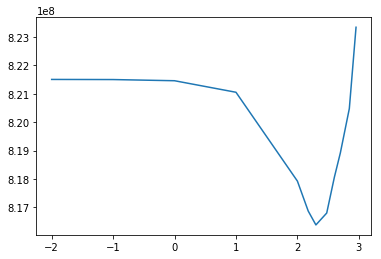

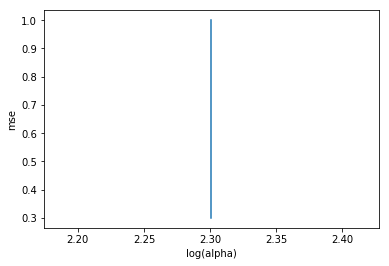

alpha is: 200.0


array([  2901.42684215,   3031.68529124,  -2265.19388837,  12644.07794971,
         3445.42404432,   5504.41287077,   -972.03517474,  -1256.59306524,
         4897.96672252,      0.        ,   8585.47717218,     -0.        ,
         2172.68735425,  -6163.24134887,   3090.19906461,   4583.74634296,
           56.09780548,   2426.48367821,   -287.71291731,   2898.70031572,
        10106.36712527,   -951.73492973,   2456.0887779 ,  -1073.41412603,
         4015.30031789,   5457.29716962,      0.        ,  20659.69251126,
        17702.34213608,   2104.62156044,  -2428.46852896,   8631.35775916])

In [55]:
#均方误差 axis=1 为什么？
mses = np.mean(lasso.mse_path_, axis=1)

#plt.plot(np.log10(alphas), mses)
plt.plot(np.log10(lasso.alphas_), mses)
plt.show()  #绘制在一张图上，显示异常，暂时分开 

plt.plot(np.log10(lasso.alpha_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show() 

print ('alpha is:', lasso.alpha_)
#显示特征的回归系数
lasso.coef_

经过调试，发现最佳参数 alpha = 200.0  log(alpha) = 2.30
#### 3.2 Lasso 模型与 LinearRegression 的比较

In [56]:
# 使用 Lasso 模型自带的评估模块（r2_score），并输出评估结果

#测试集
lassoScoreTest = lasso.score(X_test, y_test)
print('The value of default measurement of Lasso on test is', lassoScoreTest) 

#训练集
lassoScoreTrain = lasso.score(X_train, y_train)
print('The value of default measurement of Lasso on train is', lassoScoreTrain) 

print('lassoScoreTest - lrScoreTest = ', lassoScoreTest - lrScoreTest)
print('lassoScoreTrain - lrScoreTrain = ', lassoScoreTrain - lrScoreTrain)

The value of default measurement of Lasso on test is 0.86827740127
The value of default measurement of Lasso on train is 0.866902001861
lassoScoreTest - lrScoreTest =  -0.00140461008725
lassoScoreTrain - lrScoreTrain =  -0.000327962071065


In [ ]:
训练集上的评分比 LinearRegression 低  0.0014

测试集上的评分比 LinearRegression 低 0.00032

所以，对这个数据集，Lasso 模型不如 LinearRegression 

#### 3.3 Lasso 模型应用

In [57]:
#对测试数据进行预测
lasso_y_predict_test = lasso.predict(testX)
print('lasso_y_predict_test = ', lasso_y_predict_test)

#输出预测后的数据
testPredict = testData.copy()
testPredict['SalePrice'] = lasso_y_predict_test
testPredict.to_csv(dpath + 'AmesHouse_Predict_lasso.csv', index=False)

lasso_y_predict_test =  [ 117920.26850129  154368.67775011  198053.7969296  ...,  197316.31906726
  118176.40959105  250313.76362916]
